# Data Visualization in R

__Short Intensive Course at AISSR__


_14th January 2019_

_UvA, Roeterseiland campus, room REC B3.11_


__Prepared by Diliara Valeeva, CORPNET, AISSR__

email: d.valeeva@uva.nl

http://diliaravaleeva.com

http://corpnet.uva.nl

https://twitter.com/diliara_valeeva

## Outline of the notebook

__Part 1. Theory__

* Theory behind ggplot
* Simple ggplot example
* Main visualization rules

__Part 2. Practice__
* Distribution
* Composition
* Relationship
* Comparison

__Part 3. Concluding remarks__
* Preparing for publications
* Summarizing main rules

## Program
10.00 - 11.00. Part 1. Theory

11.00 - 11.15. Coffee Break

11.15 - 12.15. Part 2. Practice

12.15 - 13.00. Lunch

13.00 - 14.00.  Part 2. Practice

14.00 - 14.15. Coffee Break

14.15 - 15.00. Concluding remarks

# Part 1: Theory

## Theory behind ggplot

ggplot is based on the ideas of [The Grammar of Graphics] (https://www.springer.com/us/book/9780387245447) book

__Main principle:__ any plot can be split into the following basic parts:

__Plot = Data + Aesthetics + Geometry__

![image](https://image.slidesharecdn.com/grammarofgraphicsdvny-181102042310/95/grammar-of-graphics-the-secret-sauce-of-powerful-data-stories-8-638.jpg?cb=1541133222)

__Data:__ a data frame containing the variables that you want to visualize

__Aesthetics:__ x and y variables.
Also used to tell ggplot how data should be displayed (color, size, shape, fill, position etc)

__Geometry:__ the type of graphics (bar plot, histogram, box plot, line plot, scatter plot etc)

## How it works: Starting with ggplot

### Prerequisites

In [24]:
## Install packages
# ggplot2 is a part of 'tidyverse' group of packages:
install.packages("tidyverse")
library(tidyverse)

## Setting universal plot size:
options(repr.plot.width=5, repr.plot.height=4)

## Attaching datasets that we will use in this tutorial: 
# Dataset on sleep times of mamals: https://ggplot2.tidyverse.org/reference/msleep.html
sleep <- ggplot2::msleep

# Dataset on prices of diamonds: https://ggplot2.tidyverse.org/reference/diamonds.html
diamonds <- ggplot2::diamonds

# US economics time series data: https://ggplot2.tidyverse.org/reference/economics.html
econ <- ggplot2::economics

# Reference manual of ggplot: https://ggplot2.tidyverse.org/reference/

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Adding layers to ggplot plot

In [10]:
# The mammals sleep dataset

head(sleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


__The structure of a ggplot plot:__

__Plot = Data + Aesthetics + Geometry__

#### 1. First step:
Plot = Data + Aesthetics

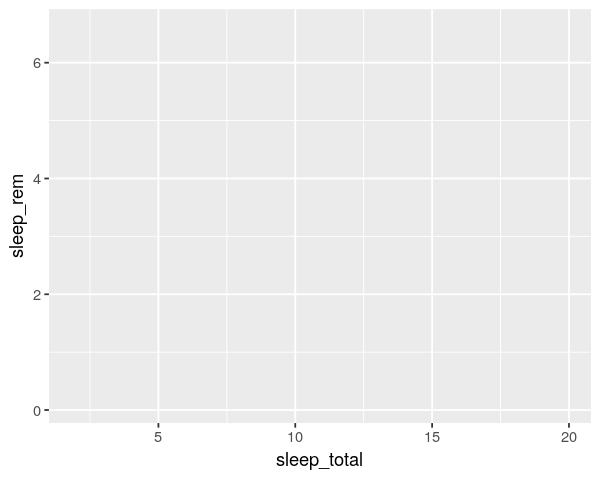

In [27]:
ggplot(sleep, # data: sleep
       aes(x = sleep_total, y = sleep_rem)) # aes: x axis is 'sleep_total' variable; y axis is 'sleep_rem' variable

# The output is a grid with only x-axis and y-axis.
# Because ggplot doesn't know 'geometry' yet (or which type of plot to choose)

#### 2. Second step:
Plot = Data + Aesthetics + Geometry

We want to have a scatterplot in order to see the relationship between two variables: sleep_total and sleep_rem.

In ggplot terms, scatterplot is 'geom_point'

Warning message:
“Removed 22 rows containing missing values (geom_point).”

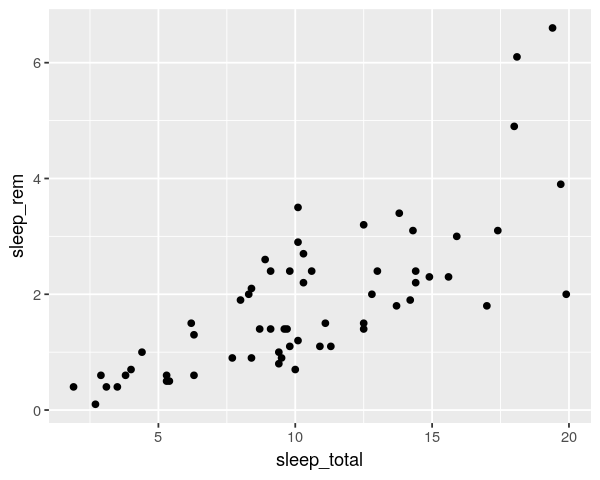

In [28]:
ggplot(sleep,
       aes(x = sleep_total, y = sleep_rem)) + 
        geom_point() # scatterplot

#### 3. Third step:

Plot = Data + Aesthetics + Geometry

Adding geometry parameters: changing color and size of points

Warning message:
“Removed 22 rows containing missing values (geom_point).”

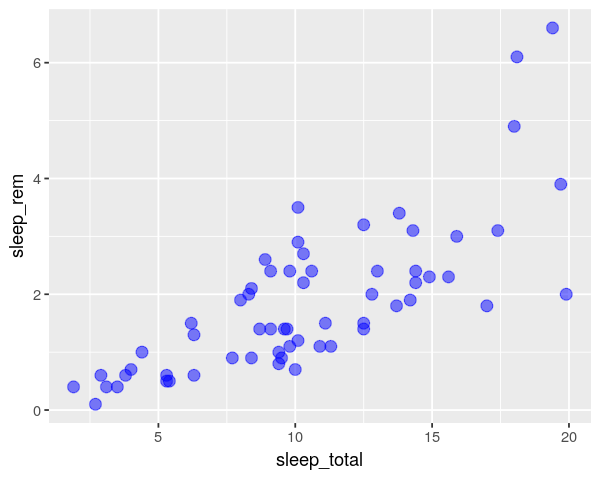

In [30]:
ggplot(sleep,
       aes(x = sleep_total, y = sleep_rem)) + 
      geom_point(alpha = 0.5, col = "blue", size = 3)

#### 4. Fourth step:

Plot = Data + Aesthetics + Geometry

Adding the title and the labels of of x and y axes

Warning message:
“Removed 22 rows containing missing values (geom_point).”

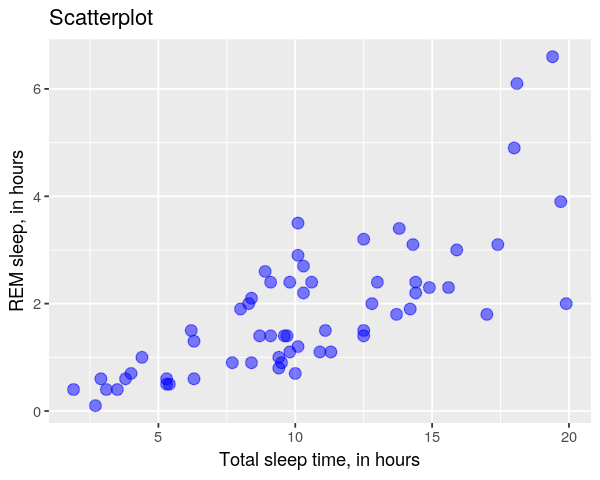

In [32]:
ggplot(sleep,
       aes(x = sleep_total, y = sleep_rem)) +
  geom_point(alpha = 0.5, color = "blue", size = 3) +
labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")

#### 5. Fifth step:

Plot = Data + Aesthetics + Geometry

Changing limits of x and y axes, changing theme of the plot

Warning message:
“Removed 22 rows containing missing values (geom_point).”

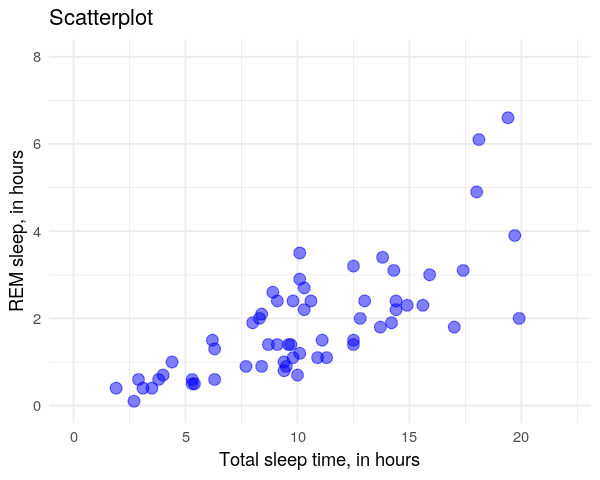

In [33]:
ggplot(sleep,
        aes(x = sleep_total, y = sleep_rem)) +
        geom_point(alpha = 0.5, color = "blue", size = 3) +
        labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")+
        xlim(0,22) + ylim(0,8) +
        theme_minimal()

In [34]:
# Saving plot

plot1 <- ggplot(sleep,
        aes(x = sleep_total, y = sleep_rem)) +
        geom_point(alpha = 0.5, color = "blue", size = 3) +
        labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")+
        xlim(0,22) + ylim(0,8) +
        theme_minimal()

ggsave(plot = plot1, 'scatterplot_sleep.png', width=5, height=5, dpi = 300)

# Saves to a working directory

Warning message:
“Removed 22 rows containing missing values (geom_point).”

## Summary

* What we did: we started with an empty plot and continued adding different layers.


* This is the idea behind ggplot. These layers are unlimited (see ggplot cheatsheet)


* But remember that less is more. 

![image](http://static1.squarespace.com/static/56713bf4dc5cb41142f28d1f/5671e8bf816924fc22651410/5671eae2816924fc2265189a/1450306274301/data-ink.gif?format=original)

# Part 2: Practice

__What would you like to show?__
1. Distribution
2. Composition
3. Relationship
4. Comparison

![image](https://i1.wp.com/www.tatvic.com/blog/wp-content/uploads/2016/12/Pic_2.png)

__Additional questions:__
- How many variables in one plot?
- How many data points per variable?
- Is data over time or static?

__Most often, you will use these types of plots:__
* histogram
* scatter plot
* box plot
* bar plot
* column plot
* line plot
* heatmap

__What we will learn in this tutorial:__
1. _Distribution_: histogram, box plot
2. _Composition_: bar plot, column plot
3. _Relationship_: scatter plot, heatmap
4. _Comparison_: line plot

## 1. Distribution

* The distribution is the relationship between the variable value and its frequency
* Used when we want to know if the assumptions of our statistics hold
* Often we make distribution plots for a continious variable over a categorical variable (e.g. distribution of grades per class)

### 1 continious variable: histogram
* Histogram breaks the data into bins and shows frequency distribution of these bins

__Basic histogram:__
ggplot(data, aes(x=variable)) + geom_histogram()
            
__Main aesthetics:__
* binwidth: the width of histogram bins
* fill: color of bins
* color: color of the borders
* linetype: type of border lines
* alpha: transparency of bins

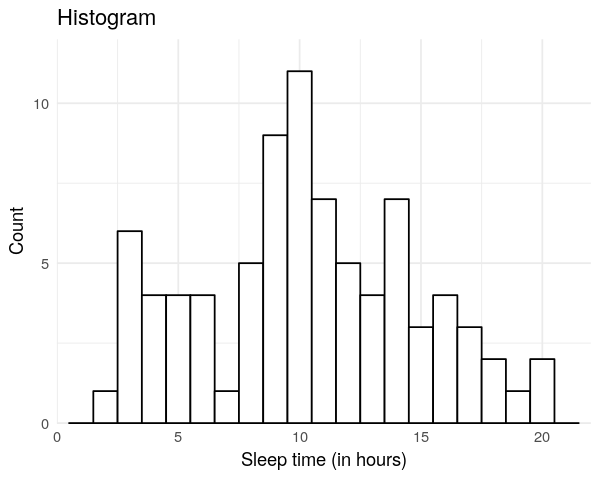

In [45]:
# Example: plotting the distribution of sleep times

ggplot(sleep, aes(x = sleep_total)) + 
  geom_histogram(binwidth=1, # width of bins
                        color="black", # color of borders
                        fill="white") + # color of filling
scale_x_continuous(breaks = seq(0,22,by = 5), limits = c(0,22), expand = c(0,0))+ # setting limits of axes, forcing to start axes from 0
scale_y_continuous(breaks = seq(0,12,by = 5), limits = c(0,12), expand = c(0,0))+
labs(x = "Sleep time (in hours)", # labeling x axis
       y = "Count", #labeling y axis
       title = "Histogram")+ # title of the histogram
theme_minimal() # theme of plot: minimal

_Exercises_:
* Try different bin width
* Try different colors
* Try different theme
* Set different limits and breaks of axes
* Plot different variable

_Notes:_
* Instead of color names, you can use HEX color codes, e.g. fill = "#B7950B" https://htmlcolorcodes.com/

### 1 continuous variable and 1 categorical variable: box plot

* Shows the summary of the distribution: min, max, medain, 25th & 75th percentiles
* Shows if the means of distributions are different or not
* We can also see outliers (black points)

__Basic box plot__: ggplot(data, aes(x=variable1, y=variable2)) + geom_boxplot()

__Main aesthetics__:

* alpha
* color
* fill
* linetype
* size
* width

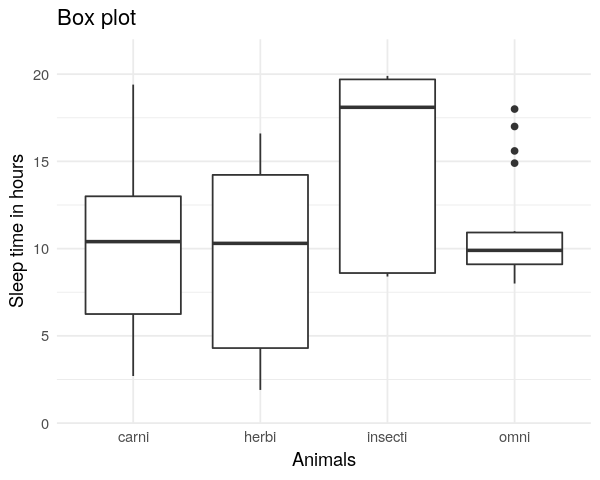

In [57]:
# Example: plotting the distribution of sleep times over different animal groups

ggplot(subset(sleep, !is.na(vore)), aes(x = vore, y = sleep_total))+
    geom_boxplot(fill = "white", size = 0.5)+
    scale_y_continuous(breaks = seq(0,22,by = 5), limits = c(0,22), expand = c(0,0))+
    labs(title = "Box plot", x = 'Animals', y = 'Sleep time in hours') +
    theme_minimal()


_Exercises:_
* Try using different aestetics
* Assign different ticks for y axis 

_Notes:_
* by adding + coord_flip(), you can turn plot horizontally

## 2. Relationship

### 2 continious variables: scatter plot
* Used for showing the relationship between two variables
* Useful for finding out correlations, detecting anomalious outliers

__Basic scatter plot:__ ggplot(data, aes(x=variable1, y=variable2)) + geom_point()

__Main aesthetics:__
* alpha: transparency
* color: color of the filling
* fill: color of borders
* shape: shape of the points
* size: size of the points
* stroke: width of the border

Warning message:
“Removed 20 rows containing missing values (geom_point).”

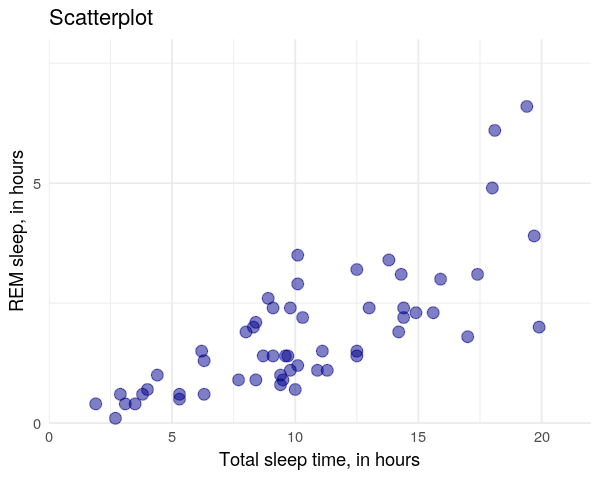

In [59]:
# Example: plot the relationship between sleep time and REM time

ggplot(subset(sleep, !is.na(vore)), aes(x= sleep_total, y = sleep_rem)) +
    geom_point(alpha = 0.5, color = "darkblue", size = 3)+
    scale_x_continuous(breaks = seq(0,22,by = 5), limits = c(0,22), expand = c(0,0))+ # setting limits of axes, forcing to start axes from 0
    scale_y_continuous(breaks = seq(0,8,by = 5), limits = c(0,8), expand = c(0,0))+
    labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")+
    theme_minimal()

### 2 continious variables and 1 categorical variable: scatter plot

'sleep' dataset has data on sleeping times of 4 types of animals:

* carni - meat eaters
* herbi - plant eaters
* omni - eat both meat and plants
* insecti - insect eaters

'vore' variable has missing values. We delete them using !is.na(vore), otherwise ggplot2 plots these 'NA's as an additional category.

Warning message:
“Removed 20 rows containing missing values (geom_point).”

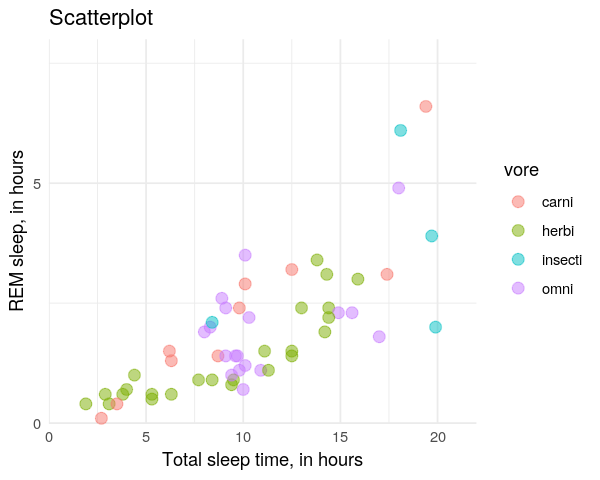

In [62]:
# Example: plot the relationship between sleep time and REM time, color points by 'vore' category

ggplot(subset(sleep, !is.na(vore)), aes(x = sleep_total, y = sleep_rem, color = vore)) +
    geom_point(alpha = 0.5, size = 3)+
    scale_x_continuous(breaks = seq(0,22,by = 5), limits = c(0,22), expand = c(0,0))+
    scale_y_continuous(breaks = seq(0,8,by = 5), limits = c(0,8), expand = c(0,0))+
    labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")+
    theme_minimal()

Warning message:
“Removed 20 rows containing missing values (geom_point).”

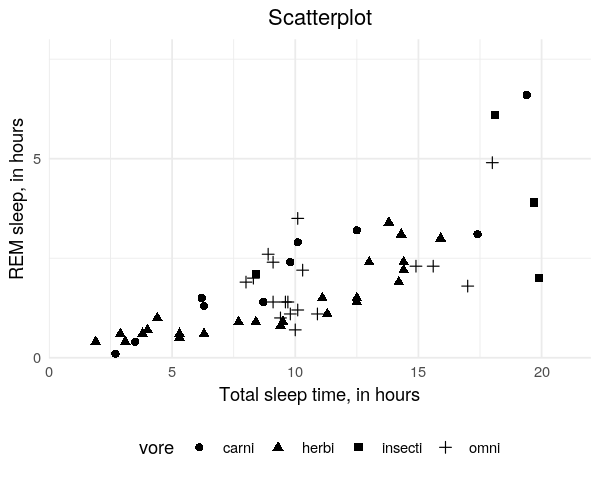

In [69]:
# Example: plot the relationship between sleep time and REM time, assign different point shapes based on 'vore'

ggplot(subset(sleep, !is.na(vore)), aes(x = sleep_total, y = sleep_rem, shape = vore)) +
    geom_point(size = 2, color = 'black')+
    scale_x_continuous(breaks = seq(0,22,by = 5), limits = c(0,22), expand = c(0,0))+
    scale_y_continuous(breaks = seq(0,8,by = 5), limits = c(0,8), expand = c(0,0))+
    labs(title = "Scatterplot", x = "Total sleep time, in hours", y = "REM sleep, in hours")+
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5),  # center the title of the plot
    legend.position="bottom") # change the position of the legend

_Exercises:_
* Play with 'stroke' and 'shape' (assign numbers)
* Assign color and shape at the same time
* Change the order of categories in legend
* Try to size points by third contionious variable (using size = variable)

### 2 categorical variables + 1 continious variable: heatmap

__Basic bar or column plot:__ ggplot(data, aes(x=variable1, y =variable2)) + geom_raster(aes(fill=variable3))

__Main aesthetics:__
* fill
* alpha

In [100]:
# Example: plotting team performance over several metrics

# create data on team performance
team <- expand.grid(teams = c("Team A", "Team B", "Team C", "Team D"),
                    metrics = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5"))

# add variable: performance
set.seed(6)
team$performance <- rnorm(nrow(df.team_data))

head(team)

teams,metrics,performance
Team A,Metric 1,0.26960598
Team B,Metric 1,-0.62998541
Team C,Metric 1,0.86865983
Team D,Metric 1,1.72719552
Team A,Metric 2,0.02418764
Team B,Metric 2,0.36802518


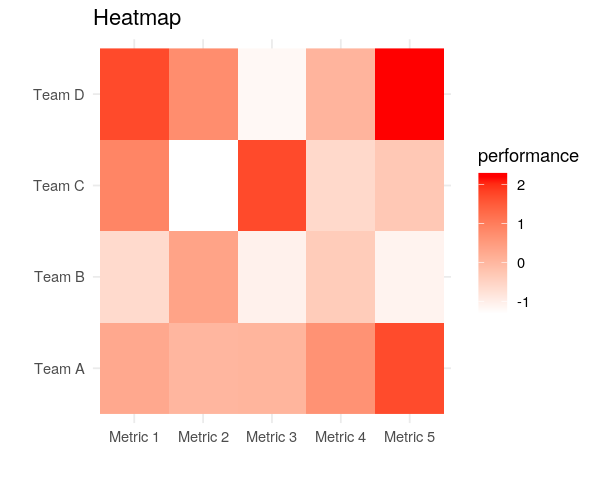

In [126]:
ggplot(data = team, aes(x = metrics, y = teams)) +
  geom_raster(aes(fill=performance))+
  scale_fill_gradient(low='white', high = 'red')+
  labs(title ="Heatmap", x = "", y = "")+
  theme_minimal()

_Exercises:_

* Try different colors

## 3. Comparison

* We are interested in values of a variable, not distribution
* We want to compare values per each category or values over time
* Usually used if we want to show the rank/sequence of values

### 1 categorical variable: column or bar plot
* Column plots are vertical, bar plots are horizontal
* If the category calues are long, use bar plot. Otherwise, column plots
* If the number of categories is less than 5-7, use column charts
* If the number of categories is more than 7, use bar charts

__Basic bar or column plot:__  ggplot(data, aes(x=variable1) + geom_bar()

__Main aesthetics:__
* color
* fill
* alpha
* linetype
* size

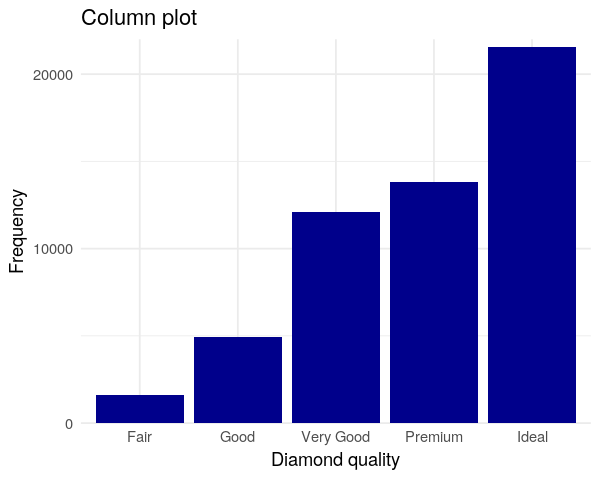

In [129]:
# Example: plotting the number of cases per category of diamonds 

ggplot(diamonds, aes(x = cut)) +
    geom_bar(fill = 'darkblue') +  
    scale_y_continuous(breaks = seq(0,22000,by = 10000), limits = c(0,22000), expand = c(0,0))+
    labs(title = "Column plot", x = "Diamond quality", y = "Frequency")+
    theme_minimal()

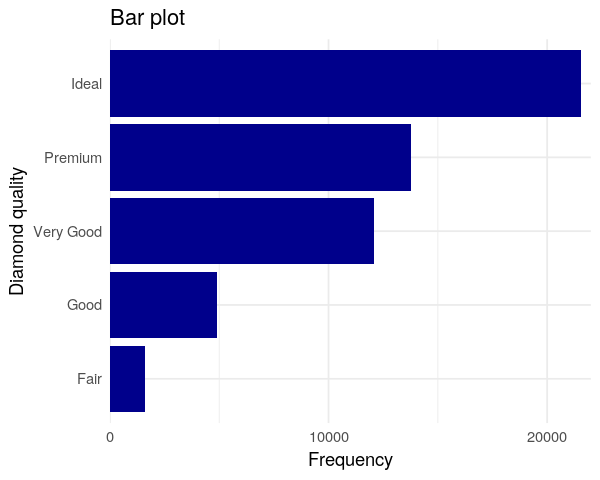

In [130]:
# Flipping coordinates:

ggplot(diamonds, aes(x = cut)) +
    geom_bar(fill = 'darkblue') +  
    scale_y_continuous(breaks = seq(0,22000,by = 10000), limits = c(0,22000), expand = c(0,0))+
    labs(title = "Bar plot", x = "Diamond quality", y = "Frequency")+
    coord_flip()+
    theme_minimal()

### 2 continious variables, one of them is time: line plot
* Time should be always represented on x-axis

__Basic line plot:__ ggplot(data, aes(x=variable1, y =variable2)) + geom_line()


__Main aesthetics:__
* color
* alpha
* group
* linetype
* size

In [226]:
## Economics dataset

# unemploy: number of unemployed in thousands
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


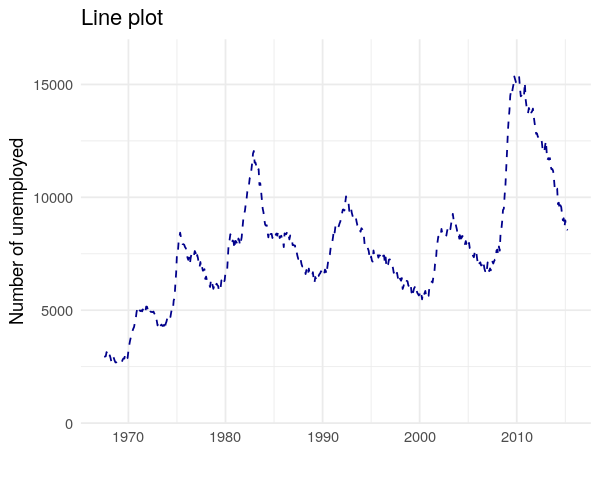

In [132]:
# Example: unemployment rate over time

ggplot(data=economics, aes(x=date, y=unemploy))+
    geom_line(color = 'darkblue', linetype = 2) +
    scale_y_continuous(breaks = seq(0,20000,by = 5000), limits = c(0,17000), expand = c(0,0))+
    labs(title = "Line plot", x = "", y = "Number of unemployed") +
    theme_minimal()

### 1 categorical variable, 2 continious variables (one of them is time): line plot
* Each line is a category

In [252]:
head(economics)

# uempmed: median duration of unemployment, in weeks
# psavert: personal savings rate

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


In [4]:
# Example: Plotting the variables 'psavert' and 'uempmed' over time

# We should first reshape the data using the 'tidyr' package:
# Collapse psavert and uempmed values in the same column ('variable').
df <- economics %>%
  select(date, psavert, uempmed) %>%
  gather(key = "variable", value = "value", -date)
head(df, 5)

date,variable,value
1967-07-01,psavert,12.5
1967-08-01,psavert,12.5
1967-09-01,psavert,11.7
1967-10-01,psavert,12.5
1967-11-01,psavert,12.5


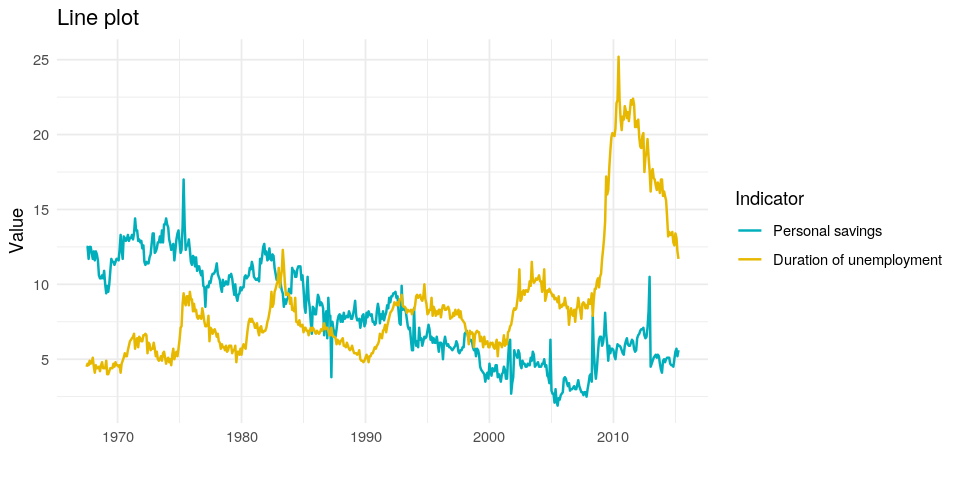

In [149]:
# Example: duration of unemployment and personal savings rate over time

ggplot(df, aes(x = date, y = value)) + 
  geom_line(aes(color = variable), size = 0.7) +
  scale_color_manual('Indicator', # title of the legend
                     labels = c("Personal savings", "Duration of unemployment"), # labels of the legend
                     values = c("#00AFBB", "#E7B800")) + # colors of the legend
  labs(title = "Line plot", x = "", y = "Value") +
  theme_minimal()

_Exercises:_
* Show months on x axis (adding adding scale_x_date(date_labels = "%b/%Y"))
* Move legend position
* Change colors, grids

## 4. Composition

* Bar or column stacked plots are often used for showing compositions
* Don't use stacked plots for too many items
* Composing parts should be similar in size

### 2 categorical variables: stacked column or stacked bar plot

__Basic stacked bar or column plot:__

ggplot(data, aes(x=variable1, fill=variable2)) + geom_bar()

__Main aesthetics:__
* color
* fill
* alpha
* linetype
* size
* weight

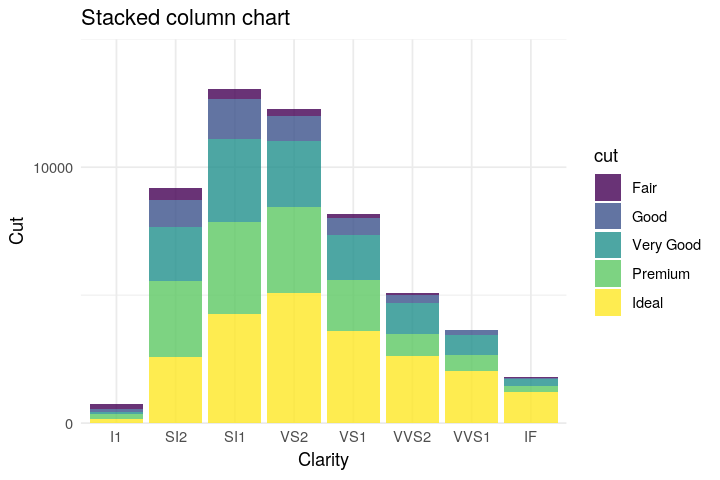

In [167]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(diamonds, aes(clarity, fill = cut)) +
    geom_bar(alpha=0.8) +
    scale_y_continuous(breaks = seq(0,15000,by = 10000), limits = c(0,15000), expand = c(0,0))+
    labs(title = "Stacked column chart", x = "Clarity", y = "Cut")+
    theme_minimal()

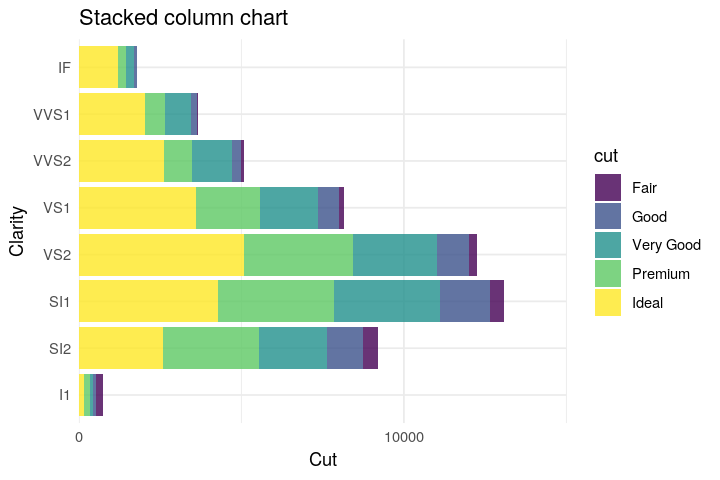

In [155]:
ggplot(diamonds, aes(clarity, fill = cut)) +
    geom_bar(alpha=0.8) +
    scale_y_continuous(breaks = seq(0,15000,by = 10000), limits = c(0,15000), expand = c(0,0))+
    labs(title = "Stacked column chart", x = "Clarity", y = "Cut")+
    theme_minimal() +
    coord_flip()

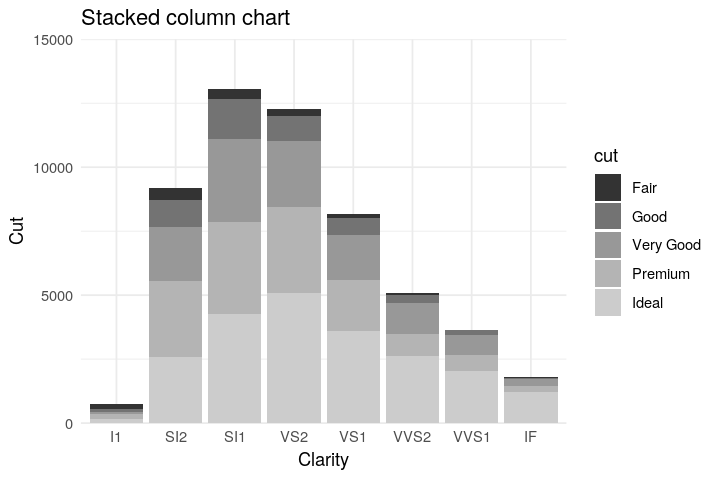

In [154]:
# Use grey scale
ggplot(diamonds, aes(clarity, fill = cut)) +
    geom_bar() +
    scale_y_continuous(breaks = seq(0,15000,by = 5000), limits = c(0,15000), expand = c(0,0))+
    labs(title = "Stacked column chart", x = "Clarity", y = "Cut")+
    scale_color_grey()+ scale_fill_grey() +
theme_minimal()

_Exercises:_
* re-order categories

### Game with guessing saturation and sizes

(https://docs.google.com/forms/d/1EUYsXEjyBnRG97uB-IxCXhHCGE289n2aIH1vR6Touis/viewform?edit_requested=true)

## Part 3. Concluding remarks

## Preparing for publication

### Saving and formatting

In [ ]:
# Save your plots in .pdf!
# Then you can work on it a bit more using Inkscape (free) or Adobe Illustrator.

plot1 = ggplot(...)
ggsave(plot = plot1, 'plot1.pdf', width=6, height=6, dpi = 600)

# If you save in .png by any reason, you can transform images using Gimp (free)

### Colors

__1. You should remember that your plot might be printed in black and white__
* Use 'scale_color_grey(), 'scale_fill_grey()' if necessary
* Print in black and white before sending

__2. ggplot basic colors are not perfect__
* 'RColorBrewer' package has lots of different palettes

__3. Remember about color blind people__

* [Useful palettes]:
(http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)
(http://dr-k-lo.blogspot.com/2013/07/a-color-blind-friendly-palette-for-r.html)
 
* [Color blind simulator: You can upload your plot and check if it's color blind friendly]
(http://www.color-blindness.com/coblis-color-blindness-simulator/)

## Main rules of good visualizations
* First decide what you would like to show.
* For continuous variables use length or position.
* For categorical variables use colors, shapes or both.
* Use white background and less grids.
* Less colors are better.
* Lighted colors are better.
* Use short and concise labels.
* Never use 3D plots.
* Never use pie charts.
* Check how your plots would look in grayscale and for color blind people.
* People should be able to understand your plots in 5 seconds.
* Less is better.

## Other materials

* ggplot reference manual:
https://ggplot2.tidyverse.org/reference/

* ggplot cheatsheet:
https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf

* Top 50 ggplot visualizations with code:
http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html#Scatterplot

* List of other visualization packages in R:
https://blog.modeanalytics.com/r-data-visualization-packages/

* Fun: Twitter account with accidental R visualizations
https://twitter.com/accidental__art

_Sources of used images:_
* https://www.r-bloggers.com/7-visualizations-you-should-learn-in-r/
* https://image.slidesharecdn.com/grammarofgraphicsdvny-181102042310/95/grammar-of-graphics-the-secret-sauce-of-powerful-data-stories-8-638.jpg?cb=1541133222
* https://www.listendata.com/2018/01/data-visualization-in-r-using-ggplot2.html
* https://www.darkhorseanalytics.com/blog/data-looks-better-naked